# Generate synthetic data for a cohort of patients with chronic diseases preclampsia


Filtrar por O14. Generar datos sintéticos porque son sensibles.

In [33]:
import pandas as pd
import os

noteboook_dir = os.getcwd()
archivo_csv = os.path.abspath(os.path.join(noteboook_dir, '..', 'data', 'real', 'df_final.csv'))
data=pd.read_csv(archivo_csv, sep=",")
print(data.head(10))
data_sesgos = data.copy()

   GLU_PRIMERA/FIRST_URG/EMERG  SAT_02_ULTIMA/LAST_URG/EMERG  \
0                          0.0                           0.0   
1                          0.0                          97.0   
2                          0.0                          95.0   
3                          0.0                          93.0   
4                          0.0                          99.0   
5                          0.0                           0.0   
6                          0.0                           0.0   
7                          0.0                          97.0   
8                          0.0                           0.0   
9                          0.0                          94.0   

   GLU_ULTIMA/LAST_URG/EMERG  EDAD/AGE  TA_MAX_ULTIMA/LAST_URGEMERG  \
0                        0.0      75.0                          0.0   
1                        0.0      62.0                        160.0   
2                        0.0      69.0                        141.0   
3          

Registro de Actividad de Atención Especializada. RAE-CMBD
El RAE-CMBD se implanta en 2016 como nuevo modelo de datos del Conjunto Mínimo Básico de Datos de las Altas Hospitalarias extendiendo el registro a otras áreas alternativas a la hospitalización (hospital de día, gabinetes de técnicas y procedimientos de alta complejidad y urgencias) y al sector privado. Su estructura, formato y contenidos, así como las normas para el registro y envío de la información se recogen en el Real Decreto 69/2015  Archivo pdf.  Se abrirá en una ventana nueva.  de 6 de Febrero, el cual regula el Registro de Actividad Sanitaria de Atención Especializada.

In [ ]:
edad_columns = [col for col in data.columns if "EDAD" in col]
print(edad_columns)
sex_columns = [col for col in data.columns if "SEXO" in col]
print(sex_columns)
uci_columns = [col for col in data.columns if "UCI_DIAS" in col]
print(uci_columns)
temp_columns = [col for col in data.columns if "TEMP_ING" in col]#OJO
print(temp_columns)
PCR_columns = [col for col in data.columns if "PC" in col]#OJO
print(PCR_columns)
SAT_columns = [col for col in data.columns if "SAT_02_ING" in col]#OJO
print(SAT_columns)
Alta_columns = [col for col in data.columns if "MOTIVO_ALTA" in col]#OJO
print(Alta_columns)
Farmacos_columns = [col for col in data.columns if "FARM" in col]#OJO
print(Farmacos_columns)
dx_columns = [col for col in data.columns if "D" in col]#OJO
print(dx_columns)


['EDAD/AGE']
['SEXO/SEX']
['UCI_DIAS/ICU_DAYS']
['TEMP_ING/INPAT']
[]
['SAT_02_ING/INPAT']
['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']
['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME']
['EDAD/AGE', 'PATIENT ID', 'UCI_DIAS/ICU_DAYS', 'DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE', 'ESPECIALIDAD/DEPARTMENT_URG/EMERG', 'F_ENTRADA_UC/ICU_DATE_IN', 'F_INGRESO/ADMISSION_D_ING/INPAT', 'DIAG ING/INPAT', 'F_ALTA/DISCHARGE_DATE_ING', 'MOTIVO_ALTA/DESTINY_DISCHARGE_ING', 'F_SALIDA_UCI/ICU_DATE_OUT', 'DESTINO/DESTINY_URG/EMERG', 'HORA/TIME_ADMISION/ADMISSION_URG/EMERG', 'F_INGRESO/ADMISSION_DATE_URG/EMERG', 'DIAG_URG/EMERG', 'INICIO_TRAT/DRUG_START_DATE', 'ID_ATC7', 'FIN_TRAT/DRUG_END_DATE', 'FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME', 'ID_ATC5', 'CONSTANTS_ING/INPAT_FECHA/DATE', 'FECHA_PETICION/LAB_DATE', 'DETERMINACION/ITEM_LAB', 'RESULTADO/VAL_RESULT', 'UNIDADES/UD_RESULT', 'DIA_10_DS5', 'PROC_05_DS5', 'PROC_01_DS5', 'PROC_03_DS5', 'DIA_09_DS5', 'DIA_05_DS5', 'DIA_07_DS5', 'DIA_PPAL_DS5', 'PROC_04_DS5', 'DIA

In [5]:
data_filtered=data[['EDAD/AGE',
                        'SEXO/SEX',
                        'UCI_DIAS/ICU_DAYS',
                        'TEMP_ING/INPAT',
                        'SAT_02_ING/INPAT',
                        'FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME',
                        'DIAG ING/INPAT',
                        'MOTIVO_ALTA/DESTINY_DISCHARGE_ING']]
data_filtered.head(10)

,EDAD/AGE,SEXO/SEX,UCI_DIAS/ICU_DAYS,TEMP_ING/INPAT,SAT_02_ING/INPAT,FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME,DIAG ING/INPAT,MOTIVO_ALTA/DESTINY_DISCHARGE_ING
0,75.0,FEMALE,1.0,35.9,0.0,RELVAR ELLIPTA inh (92+22) mcg/inh,COVID19 - POSITIVO,Domicilio
1,62.0,FEMALE,10.0,36.2,0.0,EFEDRINA amp 50 mg/5 mL,COVID19 - POSITIVO,Domicilio
2,69.0,MALE,13.2,35.8,0.0,MORFINA amp 1% 1 mL (10 mg/1 mL),COVID19 - POSITIVO,Domicilio
3,67.0,FEMALE,13.2,37.4,0.0,ACFOL comp 5 mg,COVID19 - POSITIVO,Fallecimiento
4,72.0,MALE,8.0,37.9,0.0,BISOPROLOL comp 5 mg,COVID19 - POSITIVO,Domicilio
5,55.0,MALE,4.2,35.3,0.0,PARACETAMOL sol 1 g/100 mL,COVID19 - PENDIENTE,Domicilio
6,86.0,FEMALE,2.0,36.0,0.0,AGUA BIDESTILADA amp 10 mL,COVID19 - POSITIVO,Fallecimiento
7,80.0,MALE,5.2,36.3,0.0,MORFINA amp 1% 1 mL (10 mg/1 mL),COVID19 - POSITIVO,Fallecimiento
8,49.0,FEMALE,6.2,36.0,0.0,PARACETAMOL comp 1 g,COVID19 - PENDIENTE,Domicilio
9,55.0,FEMALE,8.0,36.5,0.0,VENTOLIN aerosol 100 mcg/inh,COVID19 - POSITIVO,Domicilio


In [6]:
data_filtered.describe()

,EDAD/AGE,UCI_DIAS/ICU_DAYS,TEMP_ING/INPAT,SAT_02_ING/INPAT
count,3922.000000,3922.000000,3922.000000,3922.000000
mean,67.283274,8.613565,34.988730,1.848547
std,16.294146,7.398858,6.920162,13.078131
min,0.000000,0.000000,0.000000,0.000000
25%,57.000000,3.600000,35.900000,0.000000
50%,68.000000,7.000000,36.300000,0.000000
75%,80.000000,11.400000,36.600000,0.000000
max,106.000000,87.000000,39.700000,99.000000


Hay personas que han entrado con 0 grados, y las saturación de O2 igual

In [7]:
# !pip install skimpy
from skimpy import skim
skim(data_filtered)
data_filtered['TEMP_ING/INPAT'] = data_filtered['TEMP_ING/INPAT'].replace(0, None)
data_filtered['SAT_02_ING/INPAT'] = data_filtered['SAT_02_ING/INPAT'].replace(0, None)


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/36.4 MB ? eta -:--:--
   ----------- ---------------------------- 10.5/36.4 MB 50.4 MB/s eta 0:00:01
   ----------------------- ---------------- 21.2/36.4 MB 53.6 MB/s eta 0:00:01
   --------------------------------- ------ 30.7/36.4 MB 49.9 MB/s eta 0:00:01
   ---------------------------------------- 36.4/36.4 MB 51.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.7 MB ? eta -:--:--
   --------------- ------------------------ 10.2/25.7 MB 49.1 MB/s eta 0:00:01
   ----------------------------------- ---- 23.1/25.7 MB 54.0 MB/s eta 0:00:01
   ---------------------------------------- 25.7/25.7 MB 54.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3922   │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ string      │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column                 ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ EDAD/AGE               │   0 │      0 │   67.28 │   16.29 │   0 │     57 │    68 │    80 │   106 │  ▁▃▇▇▂  │  │
│ │ UCI_DIAS/ICU_DAYS      │   0 │      0 │   8.614 │   7.399 │   0 │    3.6 │     7 │  11.4 │    87 │   ▇▁    │  │
│ │ TEMP_ING/INPAT         │   0 │      0 │   34.99 │    6.92 │   0 │   35.9 │  36.3 │  36.6 │  39.7 │      ▇  │  │
│ │ SAT_02_ING/INPAT       │   0 │      0 │   1.849 │   13.08 │   0 │      0 │     0 │     0 │    99 │    ▇    │  │
│ └────────────────────────┴─────┴────────┴─────────┴─────────┴─────┴────────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃           ┃    ┃      ┃           ┃           ┃           ┃           ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column    ┃ NA ┃ NA % ┃ shortest  ┃ longest   ┃ min       ┃ max       ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ SEXO/SEX  │  0 │    0 │ MALE      │ FEMALE    │ FEMALE    │ MALE      │      4.78 │          1 │      3922 │  │
│ │ FARMACO/D │  0 │    0 │ ACETONA   │ BUSCAPINA │ 18FDG     │ ZYPREXA   │      22.7 │        4.4 │     17264 │  │
│ │ RUG_NOMBR │    │      │ 1L        │ COMPOSITU │ (FLUCIS)  │ comp 5 mg │           │            │           │  │
│ │ E_COMERCI │    │      │           │ M amp (20 │           │           │           │            │           │  │
│ │ AL/COMERC │    │      │           │ mg + 2.5  │           │           │           │            │           │  │
│ │ IAL_NAME  │    │      │           │ g)        │           │           │           │            │           │  │
│ │ DIAG      │  0 │    0 │ TEP       │ ESQUIZOFR │ ABSCESO   │ VULVECTOM │      17.7 │        2.8 │     10999 │  │
│ │ ING/INPAT │    │      │           │ ENIA Y    │ CAVIDAD   │ IA        │           │            │           │  │
│ │           │    │      │           │ OTROS     │ ABDOMINAL │           │           │            │           │  │
│ │           │    │      │           │ TRASTORNO │           │           │           │            │           │  │
│ │           │    │      │           │ S         │           │           │           │            │           │  │
│ │           │    │      │           │ PSICÃTICO │           │           │           │            │           │  │
│ │           │    │      │           │ S         │    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29916\3252719073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['TEMP_ING/INPAT'] = data_filtered['TEMP_ING/INPAT'].replace(0, None)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29916\3252719073.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['SAT_02_ING/INPAT'] = data_filtered['SAT_02_ING/INPAT'].replace(0, None)


In [8]:
import seaborn as sns
data_melted = data_filtered.melt(var_name='Variable',
                        value_name='Value')
print(data_melted.head(10))

   Variable Value
0  EDAD/AGE  75.0
1  EDAD/AGE  62.0
2  EDAD/AGE  69.0
3  EDAD/AGE  67.0
4  EDAD/AGE  72.0
5  EDAD/AGE  55.0
6  EDAD/AGE  86.0
7  EDAD/AGE  80.0
8  EDAD/AGE  49.0
9  EDAD/AGE  55.0


#### Dibujamos los que tengan menos de 10 entradas


<Figure size 1200x800 with 0 Axes>

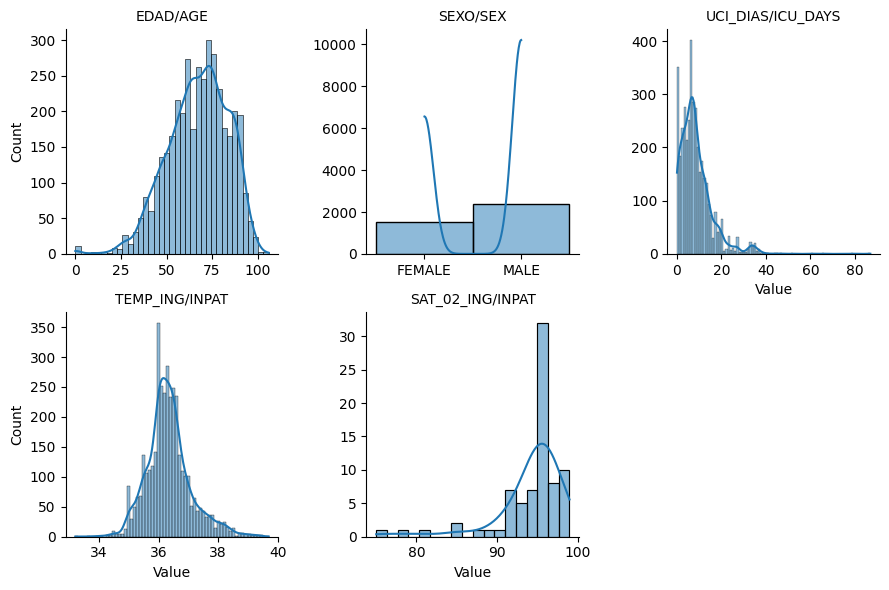

In [9]:
value_counts = data_melted.groupby('Variable')['Value'].unique().apply(len)
data_hist = data_melted[~data_melted['Variable'].isin(['DIAG ING/INPAT',
                                                       'FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME',
                                                       'MOTIVO_ALTA/DESTINY_DISCHARGE_ING'])]
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
g = sns.FacetGrid(data_hist, col='Variable', col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x='Value', kde=True)
g.set_axis_labels("Value", "Count")
g.set_titles(col_template="{col_name}")

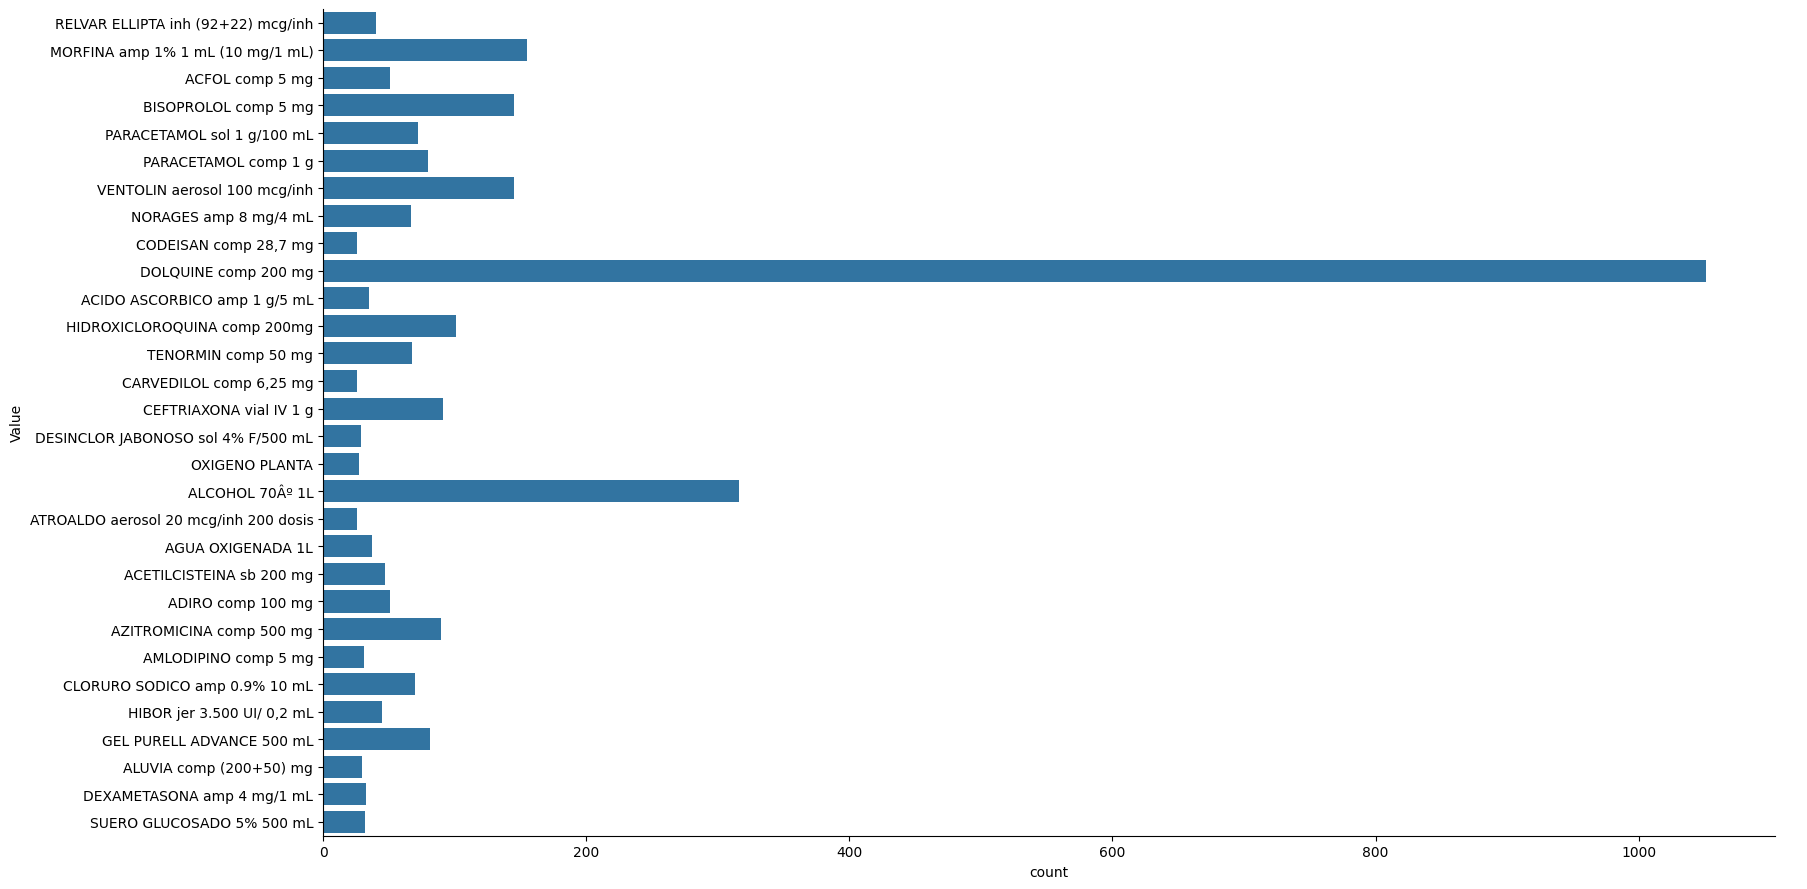

In [10]:
cat_data=data_melted[data_melted['Variable'].isin(['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'])]
num_cats = cat_data['Value'].value_counts()
num_cats = num_cats[num_cats > 25]
cat_data = cat_data[cat_data['Value'].isin(num_cats.index)]
sns.catplot(data=cat_data, y='Value', kind='count', height=9, aspect=2)

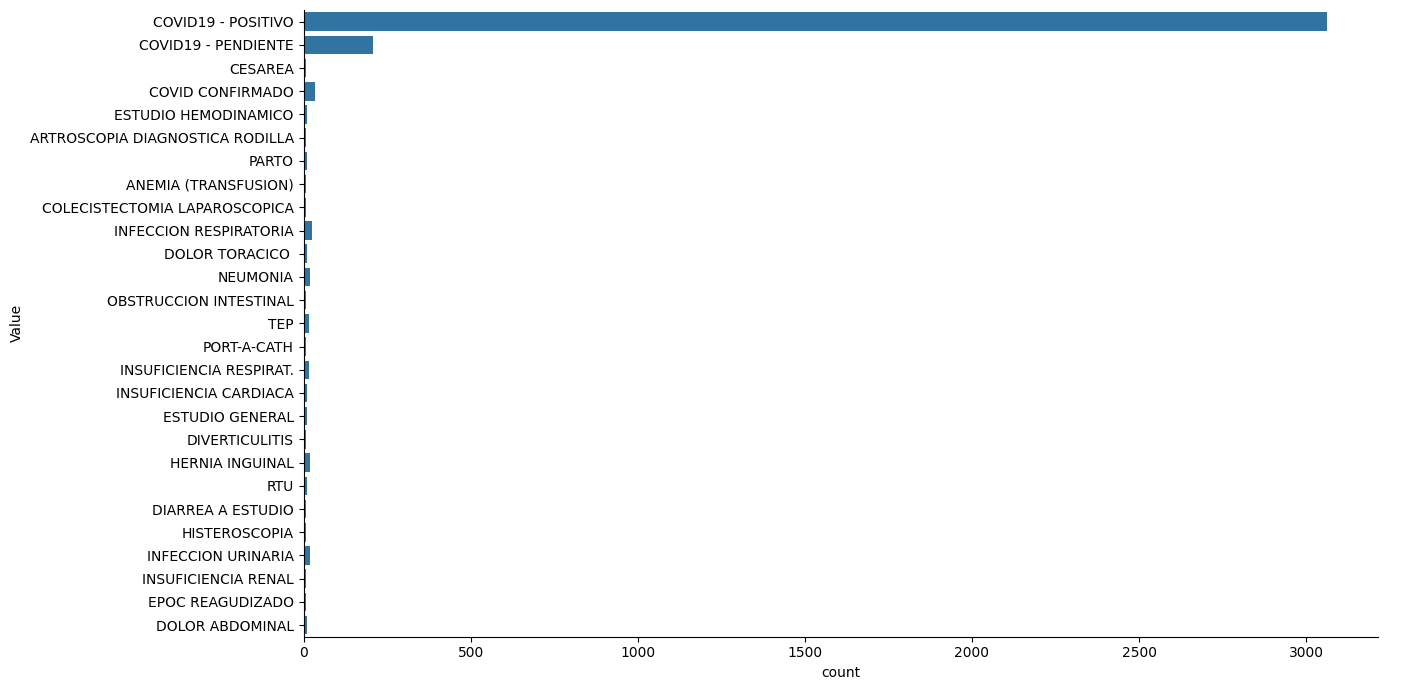

In [11]:
cat_data=data_melted[data_melted['Variable'].isin(['DIAG ING/INPAT',])]
num_cats = cat_data['Value'].value_counts()
num_cats = num_cats[num_cats > 5]
cat_data = cat_data[cat_data['Value'].isin(num_cats.index)]
sns.catplot(data=cat_data, y='Value', kind='count', height=7, aspect=2)

La mayoría de los pacientes entrar por COVID (positivo o pendiente) aunque otros entrar por diferentes dolencias y dan positico en la prueba COVID.

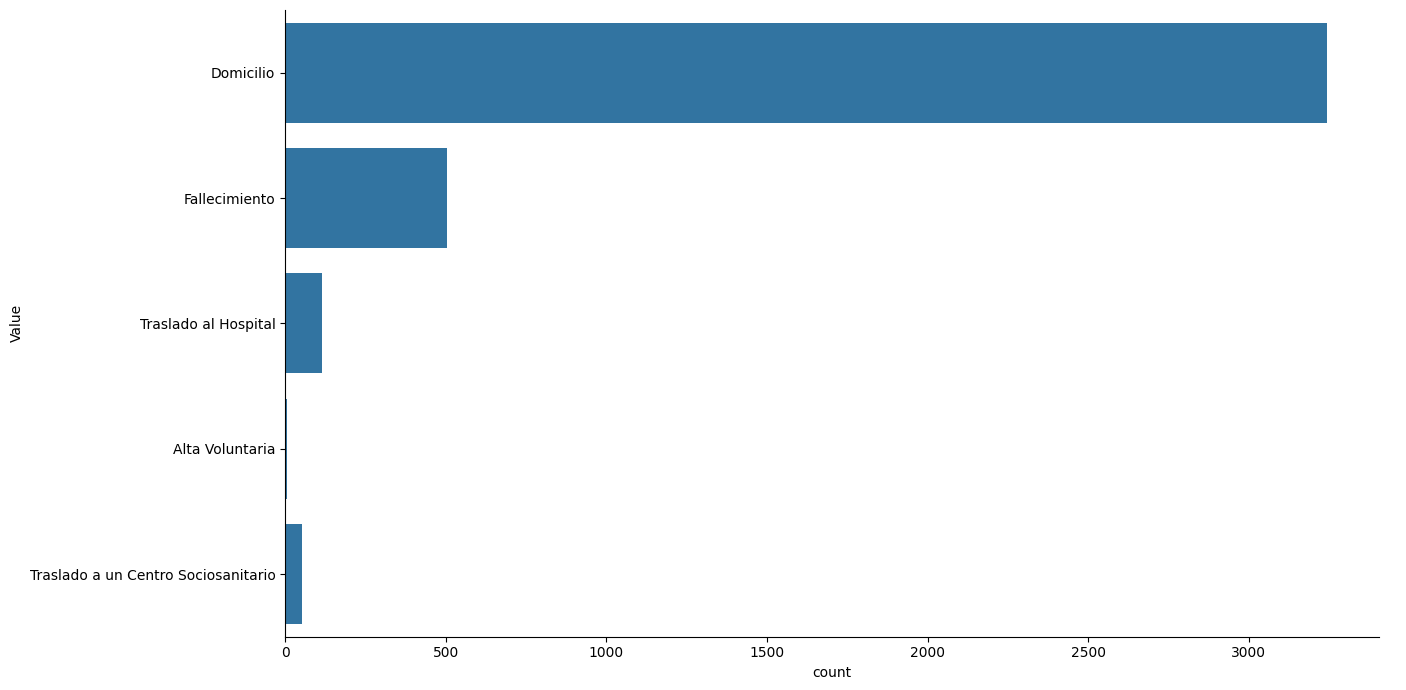

In [12]:

cat_data=data_melted[data_melted['Variable'].isin(['MOTIVO_ALTA/DESTINY_DISCHARGE_ING'])]
num_cats = cat_data['Value'].value_counts()
num_cats = num_cats[num_cats > 5]
cat_data = cat_data[cat_data['Value'].isin(num_cats.index)]
sns.catplot(data=cat_data, y='Value', kind='count', height=7, aspect=2)

### heatmap

In [13]:
# Pivot the melted DataFrame back to wide format for numeric columns
numeric_vars = ['EDAD/AGE', 'UCI_DIAS/ICU_DAYS', 'TEMP_ING/INPAT', 'SAT_02_ING/INPAT']
print(data_filtered)
data_numeric = data_filtered[numeric_vars]

print("Numeric columns:", data_numeric.columns)
print(data_numeric.head())

      EDAD/AGE SEXO/SEX  UCI_DIAS/ICU_DAYS TEMP_ING/INPAT SAT_02_ING/INPAT  \
0         75.0   FEMALE                1.0           35.9             None   
1         62.0   FEMALE               10.0           36.2             None   
2         69.0     MALE               13.2           35.8             None   
3         67.0   FEMALE               13.2           37.4             None   
4         72.0     MALE                8.0           37.9             None   
...        ...      ...                ...            ...              ...   
3917      61.0     MALE               12.4           38.2             None   
3918      54.0     MALE               13.2           36.8             None   
3919      77.0     MALE               19.8           37.0             None   
3920      71.0     MALE               31.0           35.3             None   
3921      62.0     MALE               19.8           36.5             None   

     FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME      DIAG ING

Text(0.5, 1.0, 'Correlation Heatmap')

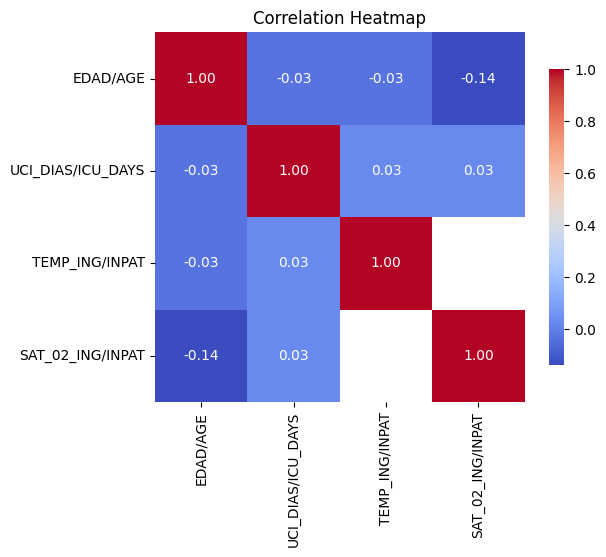

In [14]:

# Compute the correlation matrix
correlation_matrix = data_numeric.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')

### ¿Estan relacionados los diagnósticos con la medicación

In [15]:
import numpy as np

from scipy.stats import chi2_contingency
# Analizar la relación entre diagnóstico y medicación
# Usamos data_filtered para cruzar 'DIAG ING/INPAT' y 'FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'
cross_tab = pd.crosstab(
    data_filtered['DIAG ING/INPAT'],
    data_filtered['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME']
)


chi2, p, dof, expected = chi2_contingency(cross_tab)

n = cross_tab.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(cross_tab.shape) - 1)))
print(f"Cramér's V: {cramers_v:.4f}")
# Cálculo de Cramér's V para medir la asociación entre diagnóstico y medicación


Cramér's V: 0.3518


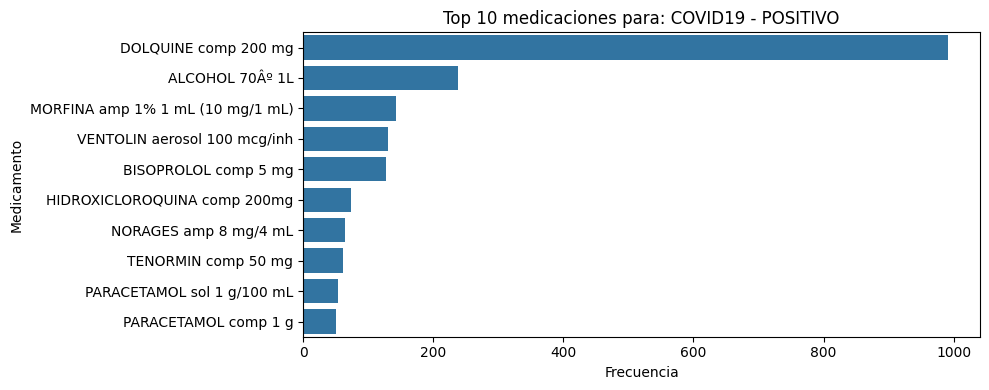

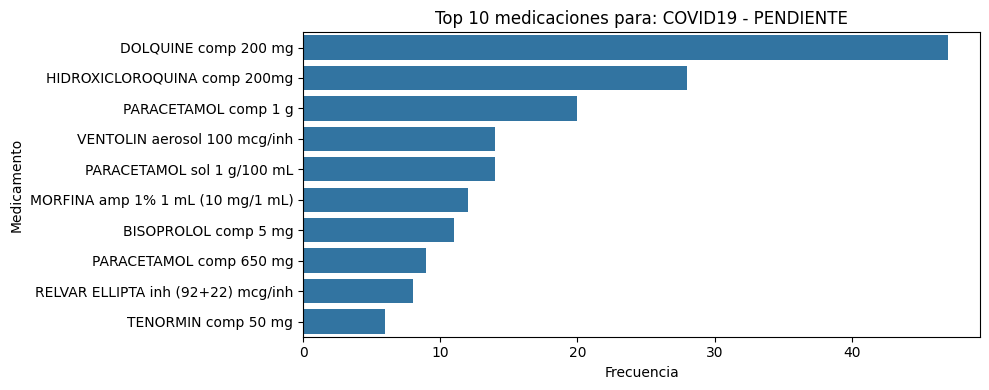

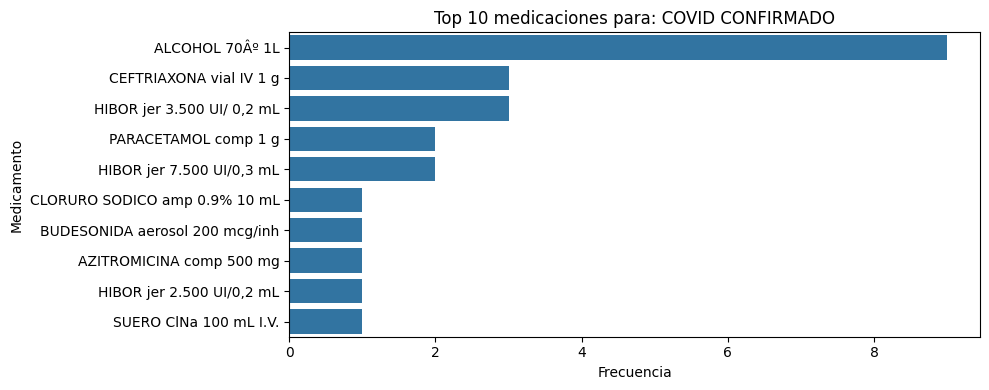

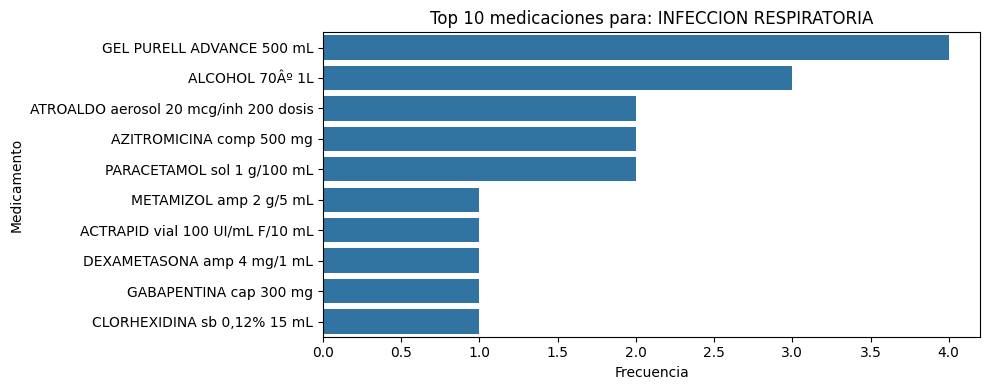

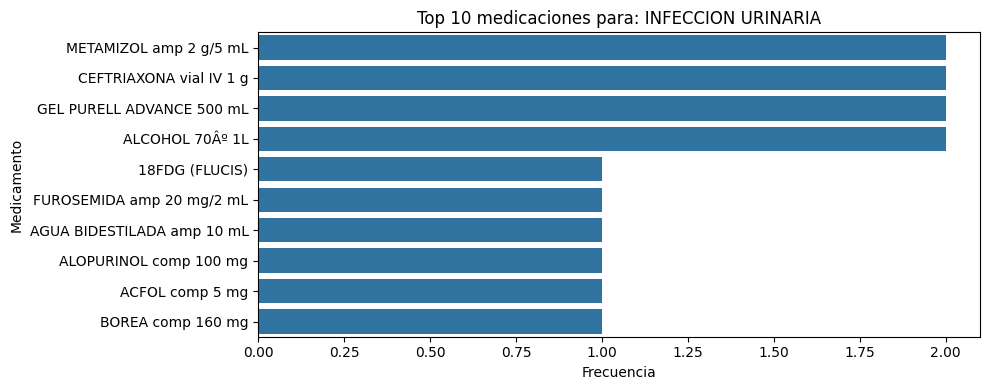

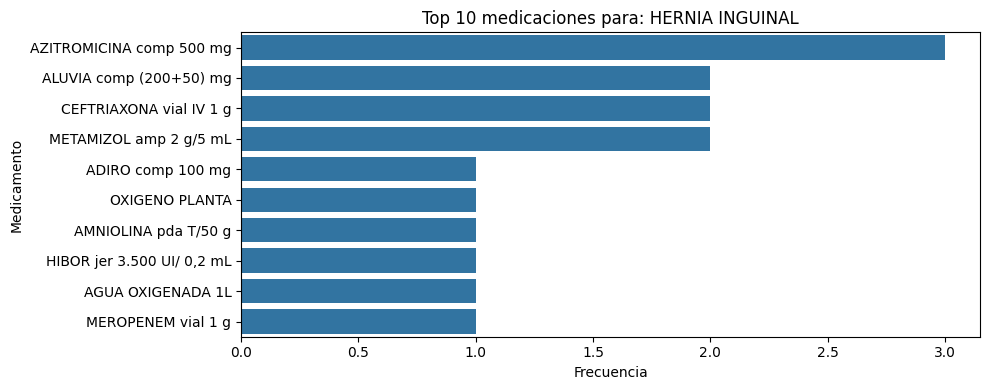

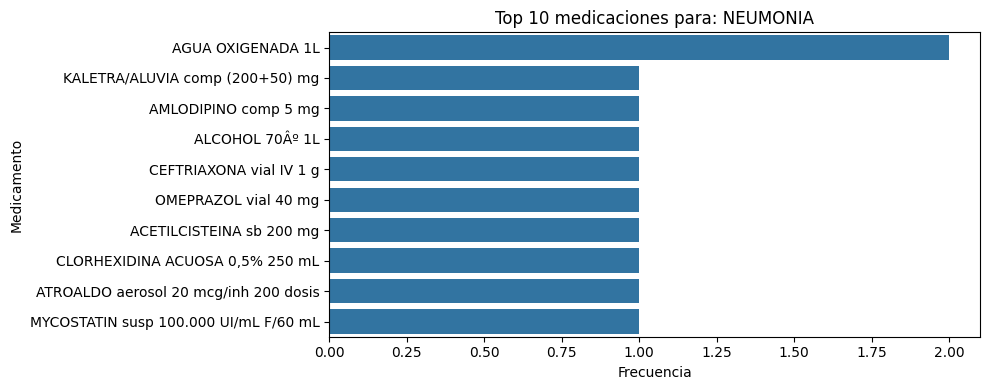

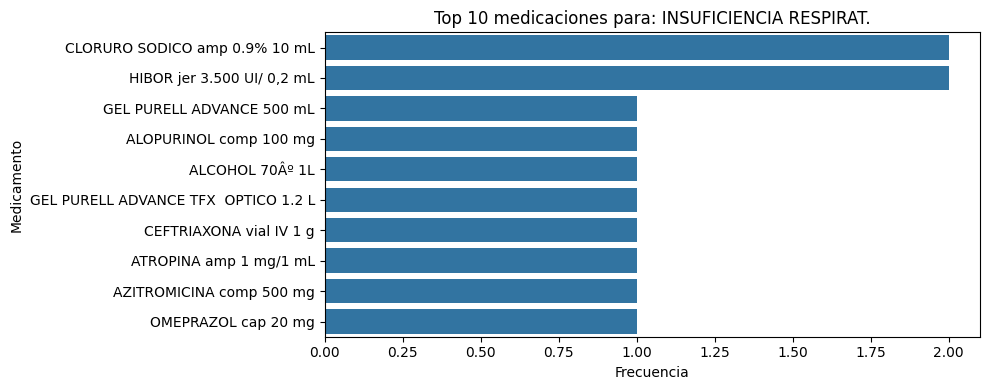

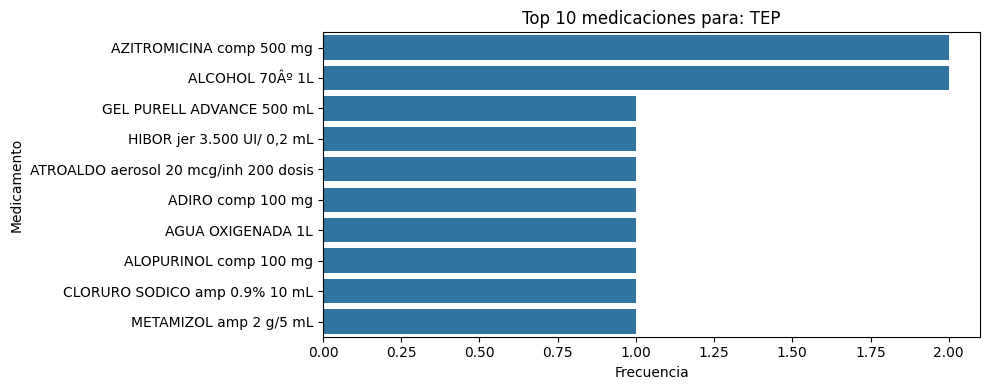

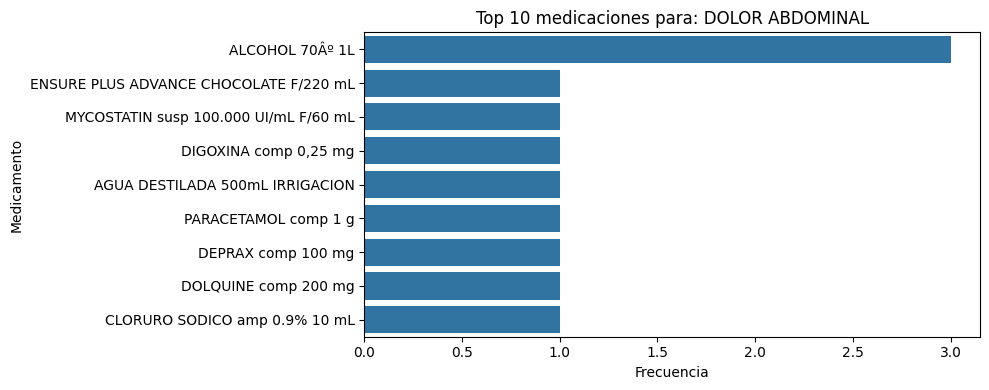

In [16]:


# Mostramos las 10 combinaciones más frecuentes
cross_tab_sum = cross_tab.sum(axis=1).sort_values(ascending=False)
top_diag = cross_tab_sum.head(10).index
cross_tab_top = cross_tab.loc[top_diag]

# Para cada diagnóstico del top 10, graficar las 10 medicaciones más frecuentes
import matplotlib.pyplot as plt

for diag in top_diag:
    diag_data = data_filtered[data_filtered['DIAG ING/INPAT'] == diag]
    top_drugs = diag_data['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'].value_counts().head(10)
    plt.figure(figsize=(10, 4))
    sns.barplot(
        y=top_drugs.index,
        x=top_drugs.values,
        orient='h'
    )
    plt.title(f'Top 10 medicaciones para: {diag}')
    plt.xlabel('Frecuencia')
    plt.ylabel('Medicamento')
    plt.tight_layout()
    plt.show()



### ¿Están relacionados los diagnósticos con la edad y la saturación?

   Variable Value
0  EDAD/AGE  75.0
1  EDAD/AGE  62.0
2  EDAD/AGE  69.0
3  EDAD/AGE  67.0
4  EDAD/AGE  72.0
5  EDAD/AGE  55.0
6  EDAD/AGE  86.0
7  EDAD/AGE  80.0
8  EDAD/AGE  49.0
9  EDAD/AGE  55.0


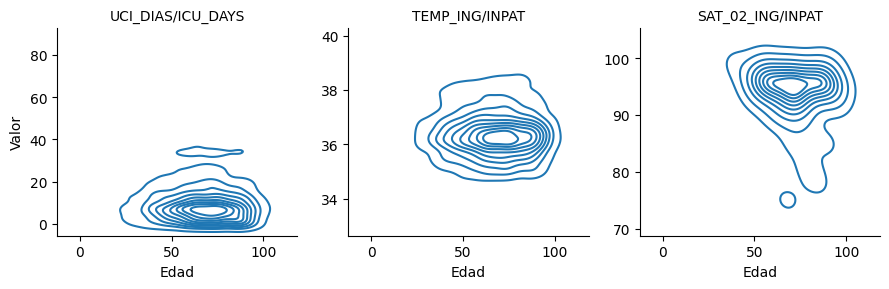

In [17]:
import seaborn as sns
print(data_melted.head(10))
data_melted_age = data_filtered.melt(
    id_vars=['EDAD/AGE'],
    var_name='Variable',
    value_name='Value'
)

# Only keep variables where Value can be converted to numeric
numeric_vars = ['UCI_DIAS/ICU_DAYS', 'TEMP_ING/INPAT', 'SAT_02_ING/INPAT']
plot_data = data_melted_age[data_melted_age['Variable'].isin(numeric_vars)].copy()
plot_data['Value'] = pd.to_numeric(plot_data['Value'], errors='coerce')

import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(plot_data, col='Variable', col_wrap=3, sharey=False)
g.map_dataframe(sns.kdeplot, x='EDAD/AGE', y='Value')
g.set_axis_labels("Edad", "Valor")
g.set_titles(col_template="{col_name}")
plt.show()


Los pacientes jovenes se recuperan rapido, y los muy mayores parece que fallecen rápido, y por ello no pasan tantos dias en UCI. La temperatura no tiene ningun indicador. Hay unos cuantos indiviuos de ~70 años con una saturación muy my baja que empujan los datos hacia abajo

Comprobamos si los más mayores fallecen más

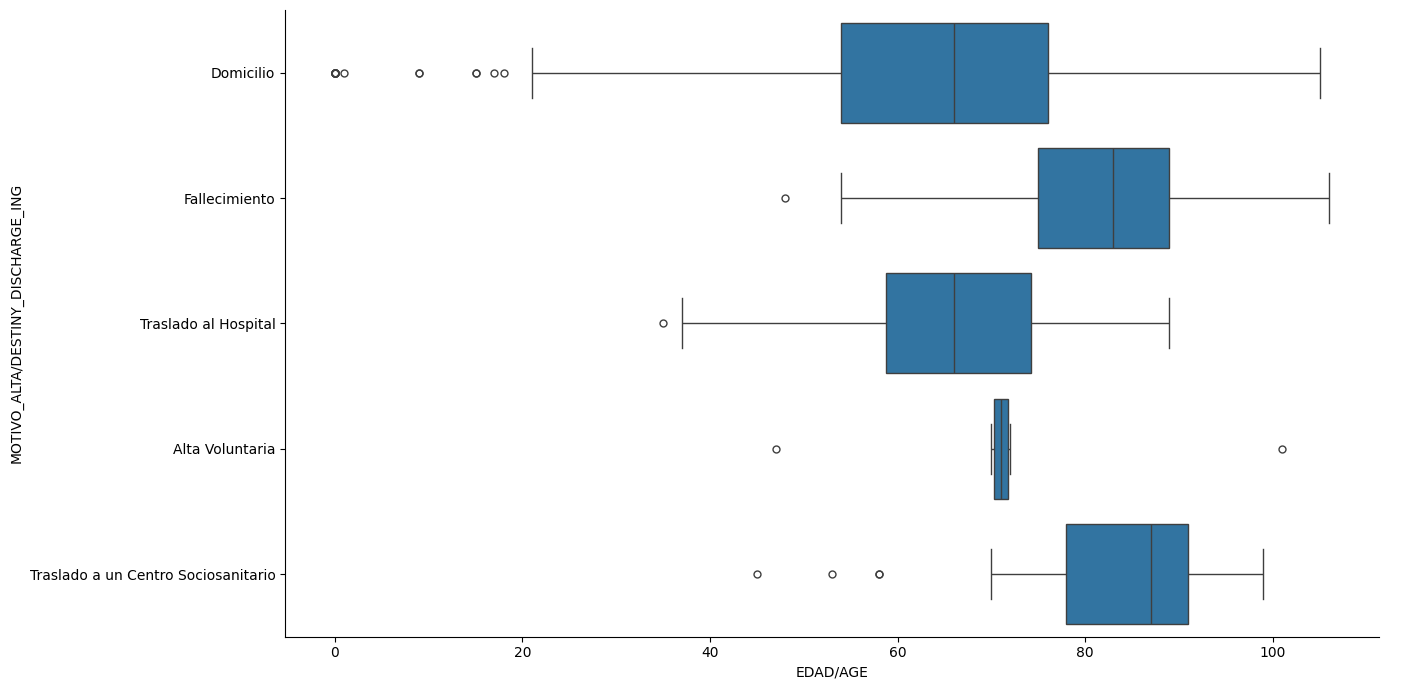

In [18]:
data_edad_alta=data_filtered[['EDAD/AGE',
                              'MOTIVO_ALTA/DESTINY_DISCHARGE_ING']]
sns.catplot(data=data_edad_alta, x='EDAD/AGE', y='MOTIVO_ALTA/DESTINY_DISCHARGE_ING', kind='box', height=7, aspect=2)


Efectivamente, los más mayores fallecen más y con mayor frecuencia son trasladados a un centro sociosanitario.

Comrpobamos ahora los fallecimientos según tratamiento

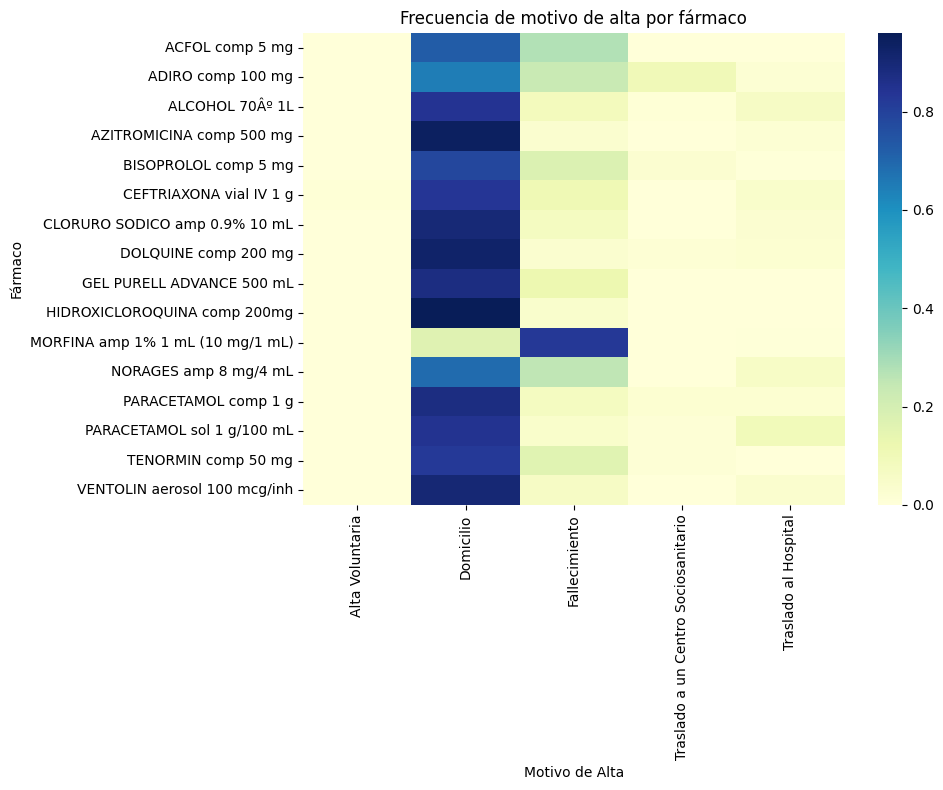

In [19]:
data_alta_farmaco = data_filtered[['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME',
                                   'MOTIVO_ALTA/DESTINY_DISCHARGE_ING']]
cat_data = data_melted[data_melted['Variable'].isin(['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'])]
num_cats = cat_data['Value'].value_counts()
num_cats = num_cats[num_cats > 50]
cat_data = cat_data[cat_data['Value'].isin(num_cats.index)]
data_alta_farmaco = data_alta_farmaco[data_alta_farmaco['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'].isin(num_cats.index)]

# Create a crosstab of frequencies (proportions) instead of counts
cross_tab_farmaco_alta = pd.crosstab(
    data_alta_farmaco['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'],
    data_alta_farmaco['MOTIVO_ALTA/DESTINY_DISCHARGE_ING'],
    normalize='index'
)

plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_farmaco_alta, annot=False, cmap='YlGnBu')
plt.title('Frecuencia de motivo de alta por fármaco')
plt.xlabel('Motivo de Alta')
plt.ylabel('Fármaco')
plt.tight_layout()
plt.show()

Nótese el uso de la morfina en pacientes que fallecen, así como el uso de una infinidad de antibióticos para tratar el COVID. La matriz está normalizada por numero de casos, para que los de COVID no saturen la matriz.

### Random forest de motivo de alta respecto a lo demás

                                     precision    recall  f1-score   support

                    Alta Voluntaria       0.00      0.00      0.00         2
                          Domicilio       0.86      0.98      0.91       811
                      Fallecimiento       0.67      0.30      0.42       126
Traslado a un Centro Sociosanitario       0.00      0.00      0.00        13
               Traslado al Hospital       0.00      0.00      0.00        29

                           accuracy                           0.85       981
                          macro avg       0.31      0.26      0.27       981
                       weighted avg       0.80      0.85      0.81       981



c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Lenovo\.virtualenvs\R35_sopra_steria-7X5YpWRb\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

<Axes: ylabel='None'>

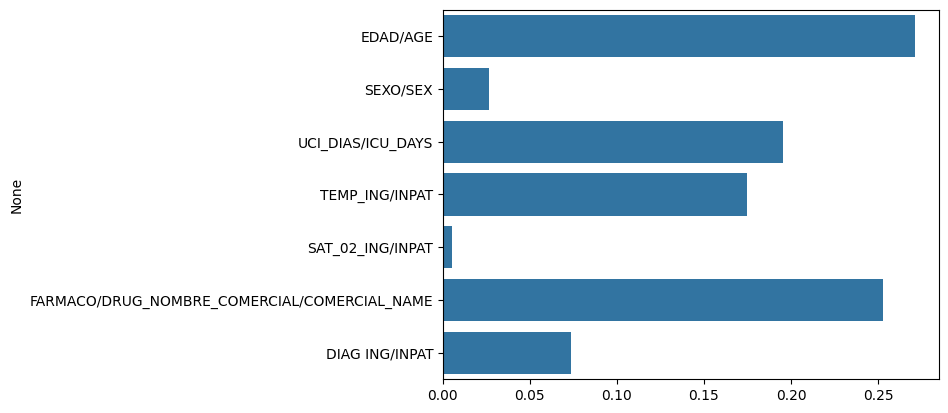

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Seleccionamos las columnas relevantes (quitamos la variable objetivo del input)
features = ['EDAD/AGE', 'SEXO/SEX', 'UCI_DIAS/ICU_DAYS', 'TEMP_ING/INPAT', 'SAT_02_ING/INPAT', 'FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME', 'DIAG ING/INPAT']
target = 'MOTIVO_ALTA/DESTINY_DISCHARGE_ING'

# Filtramos filas con valores nulos en la variable objetivo
df_rf = data_filtered.dropna(subset=[target]).copy()

# Codificamos variables categóricas
le_sex = LabelEncoder()
le_drug = LabelEncoder()
le_diag = LabelEncoder()
le_target = LabelEncoder()

df_rf['SEXO/SEX'] = le_sex.fit_transform(df_rf['SEXO/SEX'].astype(str))
df_rf['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'] = le_drug.fit_transform(df_rf['FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME'].astype(str))
df_rf['DIAG ING/INPAT'] = le_diag.fit_transform(df_rf['DIAG ING/INPAT'].astype(str))
df_rf[target] = le_target.fit_transform(df_rf[target].astype(str))

# Convertimos a numérico las columnas que puedan tener strings
for col in ['UCI_DIAS/ICU_DAYS', 'TEMP_ING/INPAT', 'SAT_02_ING/INPAT']:
    df_rf[col] = pd.to_numeric(df_rf[col], errors='coerce')

# Rellenamos NaN con -1 (o puedes usar otra estrategia)
df_rf = df_rf.fillna(-1)

X = df_rf[features]
y = df_rf[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Importancia de las variables
importances = pd.Series(rf.feature_importances_, index=features)
sns.barplot(x=importances.values, y=importances.index, orient='h')

Comprobar si hay filas duplicadas

In [21]:
# Comprobar si hay filas duplicadas de pacientes
print("Número total de filas:", data.shape[0])
print("Número de filas duplicadas:", data.duplicated().sum())

# ver las filas duplicadas
print("Filas duplicadas:")
print(data[data.duplicated(keep=False)])

Número total de filas: 3922
Número de filas duplicadas: 0
Filas duplicadas:
Empty DataFrame
Columns: [GLU_PRIMERA/FIRST_URG/EMERG, SAT_02_ULTIMA/LAST_URG/EMERG, GLU_ULTIMA/LAST_URG/EMERG, EDAD/AGE, TA_MAX_ULTIMA/LAST_URGEMERG, FC/HR_ULTIMA/LAST_URG/EMERG, PATIENT ID, TA_MAX_PRIMERA/FIRST/EMERG_URG, UCI_DIAS/ICU_DAYS, FC/HR_PRIMERA/FIRST_URG/EMERG, TA_MIN_ULTIMA/LAST_URG/EMERG, SAT_02_PRIMERA/FIRST_URG/EMERG, TA_MIN_PRIMERA/FIRST_URG/EMERG, DOSIS_MEDIA_DIARIA/DAILY_AVRG_DOSE, FC/HR_ING/INPAT, TA_MIN_ING/INPAT, TA_MAX_ING/INPAT, SAT_02_ING/INPAT, TEMP_ING/INPAT, GLU/GLY_ING/INPAT, ESPECIALIDAD/DEPARTMENT_URG/EMERG, HORA/TIME_CONSTANT_PRIMERA/FIRST_URG/EMERG, TEMP_ULTIMA/LAST_URG/EMERG, F_ENTRADA_UC/ICU_DATE_IN, HORA/TIME_CONSTANT_ULTIMA/LAST_URG/EMERG, SEXO/SEX, F_INGRESO/ADMISSION_D_ING/INPAT, DIAG ING/INPAT, TEMP_PRIMERA/FIRST_URG/EMERG, F_ALTA/DISCHARGE_DATE_ING, MOTIVO_ALTA/DESTINY_DISCHARGE_ING, F_SALIDA_UCI/ICU_DATE_OUT, DESTINO/DESTINY_URG/EMERG, HORA/TIME_ADMISION/ADMISSION_URG/E

Comprobar si existen filas de todo NULL y eliminamos

In [22]:

# Check for rows that are entirely NULL/NaN
rows_with_all_null = data[data.isnull().all(axis=1)]

print(f"Number of rows that are entirely NULL/NaN: {rows_with_all_null.shape[0]}")


Number of rows that are entirely NULL/NaN: 0


Comprobar si existen columnas de todo NULLS o con los valores todos iguales

In [23]:
# Check for columns that are entirely NULL/NaN
cols_with_all_null = data.columns[data.isnull().all()]

print(f"Columnas con todo NULL/NaN: {list(cols_with_all_null)}")

# Check for columns where all non-null values are the same
cols_with_all_same_value = []
for col in data.columns:
  if data[col].dropna().nunique() <= 1 and col not in cols_with_all_null:
    cols_with_all_same_value.append(col)

print(
    "Columnas sin todo NULL que son iguales:"
    f" {list(cols_with_all_same_value)}"
)

# Identify columns to drop (either all null or all same non-null value)
cols_to_drop = list(cols_with_all_null) + list(cols_with_all_same_value)

if cols_to_drop:
  print(f"Dropping columns: {cols_to_drop}")
  data = data.drop(columns=cols_to_drop)
  print(f"New shape of DataFrame: {data.shape}")
else:
  print("No columns to drop based on the criteria.")

Columnas con todo NULL/NaN: []
Columnas sin todo NULL que son iguales: ['GLU/GLY_ING/INPAT', 'NEO_05', 'POAD_PPAL']
Dropping columns: ['GLU/GLY_ING/INPAT', 'NEO_05', 'POAD_PPAL']
New shape of DataFrame: (3922, 129)


(OPCIONAL) Rellenamos los valores NULL con la media de la columna

In [24]:

for col in data.select_dtypes(include=np.number).columns:
    data[col].fillna(data[col].mean(), inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29916\225083890.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [25]:

for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        data[col].fillna(data[col].mean(), inplace=True)

    elif data[col].dtype == 'object':

        data[col].fillna(data[col].mode()[0], inplace=True)

# Verificamos que ya no tenemos NULL
print("\nVerificamos que ya no tenemos NULL:")
print(data.isnull().sum())

print(data.head())


Verificamos que ya no tenemos NULL:
GLU_PRIMERA/FIRST_URG/EMERG     0
SAT_02_ULTIMA/LAST_URG/EMERG    0
GLU_ULTIMA/LAST_URG/EMERG       0
EDAD/AGE                        0
TA_MAX_ULTIMA/LAST_URGEMERG     0
                               ..
DIA_03_DS6                      0
POAD_06                         0
NEO_01                          0
PROC_13                         0
DIA_11_DS6                      0
Length: 129, dtype: int64
   GLU_PRIMERA/FIRST_URG/EMERG  SAT_02_ULTIMA/LAST_URG/EMERG  \
0                          0.0                           0.0   
1                          0.0                          97.0   
2                          0.0                          95.0   
3                          0.0                          93.0   
4                          0.0                          99.0   

   GLU_ULTIMA/LAST_URG/EMERG  EDAD/AGE  TA_MAX_ULTIMA/LAST_URGEMERG  \
0                        0.0      75.0                          0.0   
1                        0.0      62

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29916\4143010424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29916\4143010424.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Comprobar que variables son categoricas y cuales son numéricas para homogeneizar (del conjunto filtrado)

In [26]:
for col in data_filtered.columns:
  col_type = data_filtered[col].dtype
  print(f"{col}, Tipo: {col_type}")
  if col_type == 'object':
    print("categórica")
  else:
    print("numérica")


EDAD/AGE, Tipo: float64
numérica
SEXO/SEX, Tipo: object
categórica
UCI_DIAS/ICU_DAYS, Tipo: float64
numérica
TEMP_ING/INPAT, Tipo: object
categórica
SAT_02_ING/INPAT, Tipo: object
categórica
FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME, Tipo: object
categórica
DIAG ING/INPAT, Tipo: object
categórica
MOTIVO_ALTA/DESTINY_DISCHARGE_ING, Tipo: object
categórica


In [27]:
# de las que son tipo object quiero saber cuales son numéricas

for col in data_filtered.columns:
  col_type = data_filtered[col].dtype
  if col_type == 'object':
    # Try to convert to numeric, if successful, it was a numeric-like object column
    try:
      pd.to_numeric(data_filtered[col], errors='raise')
      print(f"{col}, Tipo: {col_type} (Numérica disfrazada)")
    except (ValueError, TypeError):
      print(f"{col}, Tipo: {col_type} (Categórica)")
  else:
    print(f"{col}, Tipo: {col_type} (Numérica)")

EDAD/AGE, Tipo: float64 (Numérica)
SEXO/SEX, Tipo: object (Categórica)
UCI_DIAS/ICU_DAYS, Tipo: float64 (Numérica)
TEMP_ING/INPAT, Tipo: object (Numérica disfrazada)
SAT_02_ING/INPAT, Tipo: object (Numérica disfrazada)
FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME, Tipo: object (Categórica)
DIAG ING/INPAT, Tipo: object (Categórica)
MOTIVO_ALTA/DESTINY_DISCHARGE_ING, Tipo: object (Categórica)


In [28]:
#convertir las numéricas disfrazadas a numeros

for col in ['UCI_DIAS/ICU_DAYS', 'TEMP_ING/INPAT', 'SAT_02_ING/INPAT', 'EDAD/AGE']: # Added 'EDAD/AGE' here as it was also identified as an object
    # Convert to numeric, coercing errors will turn unparseable values into NaN
    data_filtered[col] = pd.to_numeric(data_filtered[col], errors='coerce')

# Now check the types again to confirm the conversion
print("\nTipos de columnas después de la conversión:")
for col in data_filtered.columns:
  col_type = data_filtered[col].dtype
  print(f"{col}, Tipo: {col_type}")



Tipos de columnas después de la conversión:
EDAD/AGE, Tipo: float64
SEXO/SEX, Tipo: object
UCI_DIAS/ICU_DAYS, Tipo: float64
TEMP_ING/INPAT, Tipo: float64
SAT_02_ING/INPAT, Tipo: float64
FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME, Tipo: object
DIAG ING/INPAT, Tipo: object
MOTIVO_ALTA/DESTINY_DISCHARGE_ING, Tipo: object


Buscamos Numéricas que esten muy lejos de las demás (variables anómalas)


Columnas numéricas para análisis de anomalías: ['EDAD/AGE', 'UCI_DIAS/ICU_DAYS', 'TEMP_ING/INPAT', 'SAT_02_ING/INPAT']


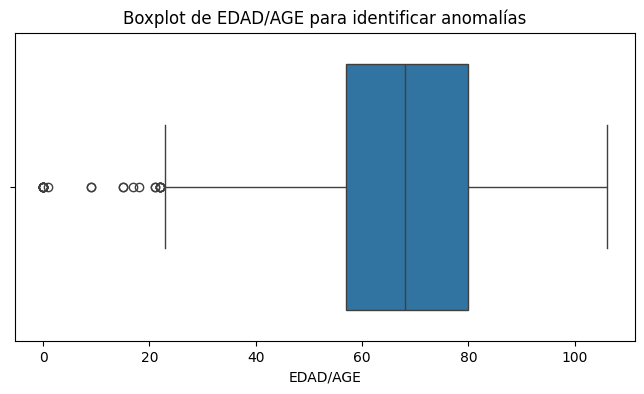


Anomalías encontradas en 'EDAD/AGE' (usando IQR):
      EDAD/AGE
22        21.0
192       18.0
264        1.0
292        0.0
706        0.0
715       22.0
800        0.0
1299      15.0
1324      22.0
1563       0.0
1621      21.0
1848       0.0
1948       0.0
1949       0.0
1950       0.0
2239       9.0
2399       9.0
2537       0.0
2635      17.0
2716      22.0
3259      15.0
3397      22.0
3410       0.0
3827      22.0
3891      22.0


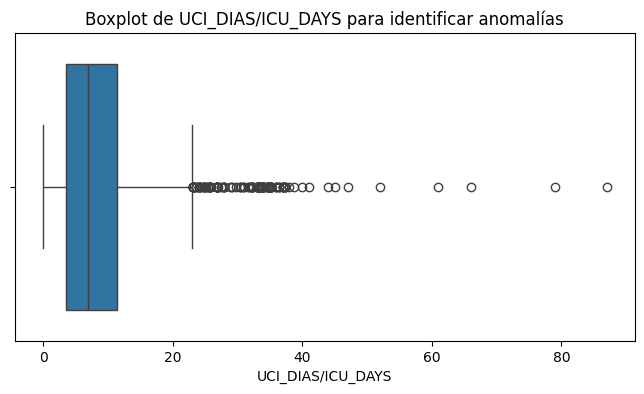


Anomalías encontradas en 'UCI_DIAS/ICU_DAYS' (usando IQR):
      UCI_DIAS/ICU_DAYS
36                 37.0
61                 28.0
78                 31.0
174                36.0
240                27.0
...                 ...
3709               25.6
3722               25.4
3868               47.0
3894               23.6
3920               31.0

[181 rows x 1 columns]


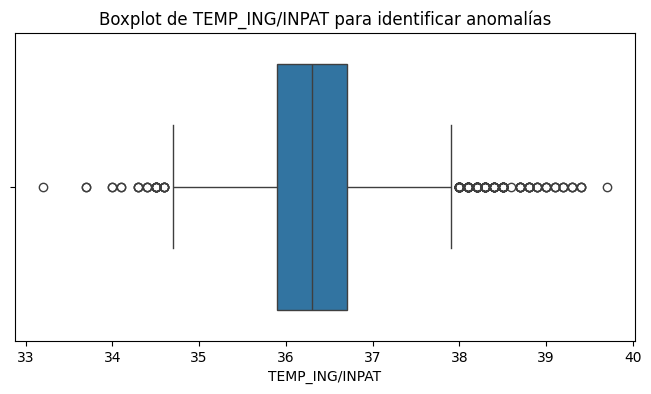


Anomalías encontradas en 'TEMP_ING/INPAT' (usando IQR):
      TEMP_ING/INPAT
36              34.1
50              34.4
81              39.2
85              39.2
90              34.5
...              ...
3858            38.2
3890            38.3
3908            38.5
3915            38.0
3917            38.2

[177 rows x 1 columns]


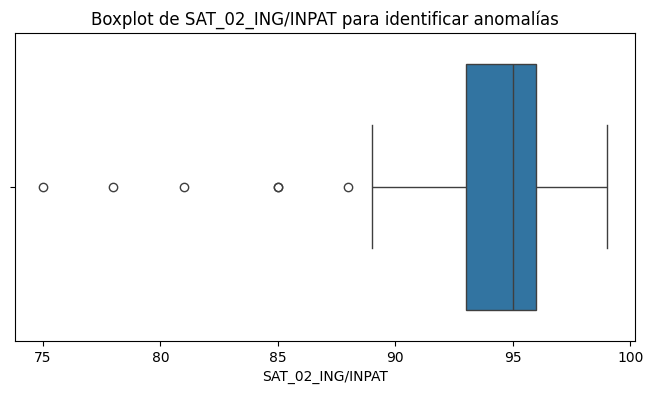


Anomalías encontradas en 'SAT_02_ING/INPAT' (usando IQR):
      SAT_02_ING/INPAT
787               75.0
2656              85.0
3096              85.0
3109              88.0
3159              78.0
3580              81.0


In [29]:

# Buscamos Numéricas que esten muy lejos de las demás (variables anómalas)

# Identificar columnas numéricas
numeric_cols = data_filtered.select_dtypes(include=np.number).columns.tolist()

print("\nColumnas numéricas para análisis de anomalías:", numeric_cols)

# Para cada columna numérica, identificar y visualizar valores atípicos (outliers)

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data_filtered[col])
    plt.title(f'Boxplot de {col} para identificar anomalías')
    plt.xlabel(col)
    plt.show()

    # Opcional: Calcular los límites para identificar outliers usando IQR
    Q1 = data_filtered[col].quantile(0.25)
    Q3 = data_filtered[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data_filtered[(data_filtered[col] < lower_bound) | (data_filtered[col] > upper_bound)]

    print(f"\nAnomalías encontradas en '{col}' (usando IQR):")
    print(outliers[[col]].dropna()) # Mostramos solo la columna con anomalías y quitamos NaNs


Pasamos las variables categoricas a numéricas para poder trabajar con ellas (One-hot encoding)

In [30]:
# pasar las variables tipo object a numericas. Muestra que valores numericos se ha dado a cada valor anterior

categorical_cols = data_filtered.select_dtypes(include='object').columns

label_encoders = {}
for col in categorical_cols:
    # Create a new LabelEncoder for each column
    le = LabelEncoder()
    # Fit and transform the column
    data_filtered[col + '_encoded'] = le.fit_transform(data_filtered[col])
    # Store the encoder
    label_encoders[col] = le
    # Print the original values and their corresponding numerical labels
    print(f"\nMapping for '{col}':")
    for original_value, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        print(f"  '{original_value}' -> {encoded_value}")

# Display the head of the DataFrame with new encoded columns
print("\nDataFrame head with encoded categorical columns:")
print(data_filtered.head())



Mapping for 'SEXO/SEX':
  'FEMALE' -> 0
  'MALE' -> 1

Mapping for 'FARMACO/DRUG_NOMBRE_COMERCIAL/COMERCIAL_NAME':
  '18FDG (FLUCIS)' -> 0
  'ACCOFIL jer 300 mcg (30 MU/0,5 mL)' -> 1
  'ACCOFIL jer 480 mcg (48 MU/0,5 mL)' -> 2
  'ACETATO POTASICO amp 1 M 10 mL' -> 3
  'ACETILCISTEINA sb 200 mg' -> 4
  'ACETONA 1L' -> 5
  'ACFOL comp 5 mg' -> 6
  'ACICLOVIR amp 250 mg' -> 7
  'ACICLOVIR comp 200 mg' -> 8
  'ACICLOVIR comp 800 mg' -> 9
  'ACIDO ASCORBICO amp 1 g/5 mL' -> 10
  'ACTOCORTINA vial 100 mg' -> 11
  'ACTRAPID vial 100 UI/mL F/10 mL' -> 12
  'ADALAT cap 10 mg' -> 13
  'ADIRO comp 100 mg' -> 14
  'ADIRO comp 300 mg' -> 15
  'ADRENALINA amp 1 mg/1 mL' -> 16
  'AERO-RED comp 40 mg' -> 17
  'AGUA BIDESTILADA amp 10 mL' -> 18
  'AGUA DESTILADA 500mL IRRIGACION' -> 19
  'AGUA ESTERIL 3 L IRRIGACION' -> 20
  'AGUA OXIGENADA 1L' -> 21
  'AKINETON comp 2 mg' -> 22
  'ALBUMINA vial 20% 50 mL (10 g/50 mL)' -> 23
  'ALCOHOL 70Âº 1L' -> 24
  'ALDACTONE comp 25 mg' -> 25
  'ALEUDRINA amp 0,2

Diferenciamos los datos entre los conjuntos de Entrenamiento, Validación y TEST

In [31]:
# 1. Elimina filas con NaN en la variable objetivo
data_filtered = data_filtered.dropna(subset=['DIAG ING/INPAT'])

# 2. Elimina clases con menos de 3 ejemplos
min_ejemplos = 3
class_counts = data_filtered['DIAG ING/INPAT'].value_counts()
clases_validas = class_counts[class_counts >= min_ejemplos].index
data_filtered = data_filtered[data_filtered['DIAG ING/INPAT'].isin(clases_validas)]

# 3. Define X e y
target_variable = 'DIAG ING/INPAT'
features = [col for col in data_filtered.columns if col != target_variable]
X = data_filtered[features]
y = data_filtered[target_variable]

# 4. Split estratificado (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Split train+val en train y val (75% train, 25% val del resto)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

# 6. Imprime resultados
print("Dimensiones de los conjuntos:")
print(f"Conjunto de Entrenamiento (X_train): {X_train.shape}")
print(f"Conjunto de Entrenamiento (y_train): {y_train.shape}")
print(f"Conjunto de Validación (X_val): {X_val.shape}")
print(f"Conjunto de Validación (y_val): {y_val.shape}")
print(f"Conjunto de Prueba (X_test): {X_test.shape}")
print(f"Conjunto de Prueba (y_test): {y_test.shape}")

print("\nDistribución de la variable objetivo ('DIAG ING/INPAT') en cada conjunto:")
print("Entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nValidación:")
print(y_val.value_counts(normalize=True))
print("\nPrueba:")
print(y_test.value_counts(normalize=True))


Dimensiones de los conjuntos:
Conjunto de Entrenamiento (X_train): (2222, 11)
Conjunto de Entrenamiento (y_train): (2222,)
Conjunto de Validación (X_val): (741, 11)
Conjunto de Validación (y_val): (741,)
Conjunto de Prueba (X_test): (741, 11)
Conjunto de Prueba (y_test): (741,)

Distribución de la variable objetivo ('DIAG ING/INPAT') en cada conjunto:
Entrenamiento:
DIAG ING/INPAT
COVID19 - POSITIVO                        0.826733
COVID19 - PENDIENTE                       0.055806
COVID CONFIRMADO                          0.009451
INFECCION RESPIRATORIA                    0.007201
INFECCION URINARIA                        0.005401
                                            ...   
PROSTATECTOMIA                            0.000900
HEMATOMA SUBDURAL                         0.000900
RECTORRAGIA                               0.000900
PANCITOPENIA                              0.000900
EXTIRP. TUMOR PARTES BLANDAS PROFUNDAS    0.000900
Name: proportion, Length: 65, dtype: float64

Validació

# Análisis de sesgos

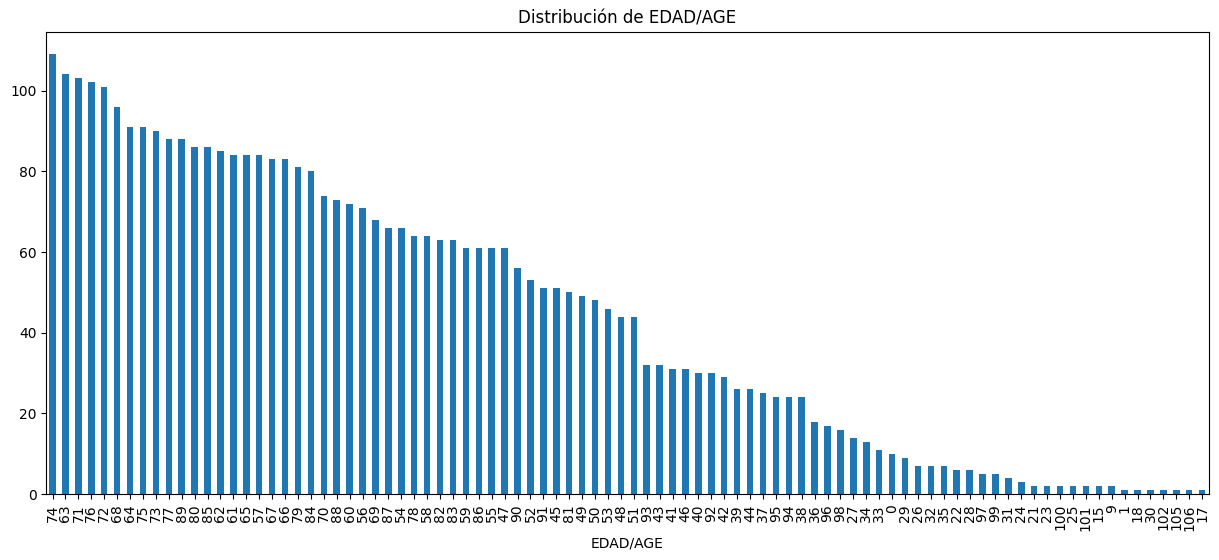

In [58]:
data_sesgos['EDAD/AGE'].astype(int).value_counts(ascending=False).plot(kind='bar', figsize=(15, 6), title='Distribución de EDAD/AGE')
plt.show()

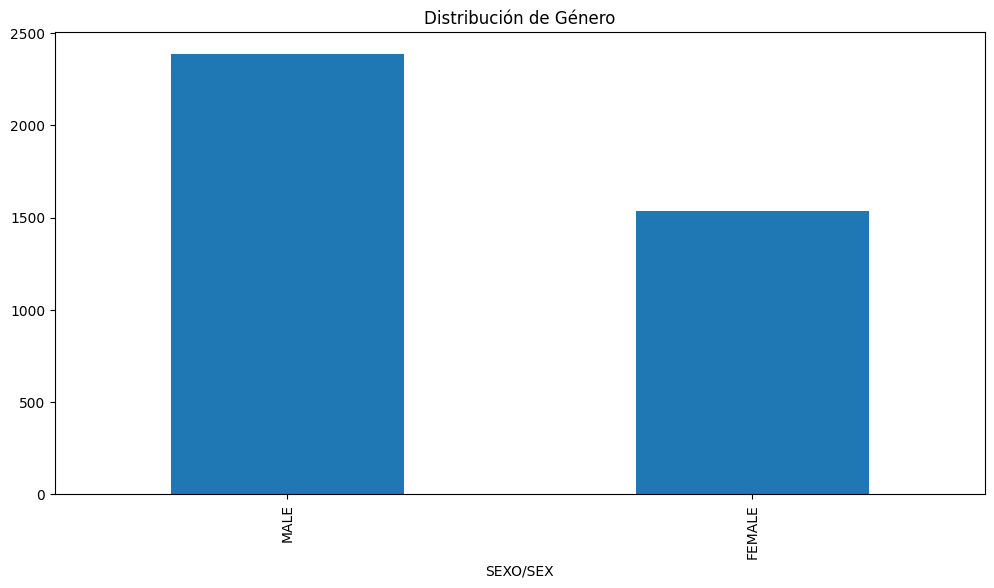

In [50]:
data_sesgos['SEXO/SEX'].value_counts().plot(kind='bar', figsize=(12, 6), title='Distribución de Género')
plt.show()